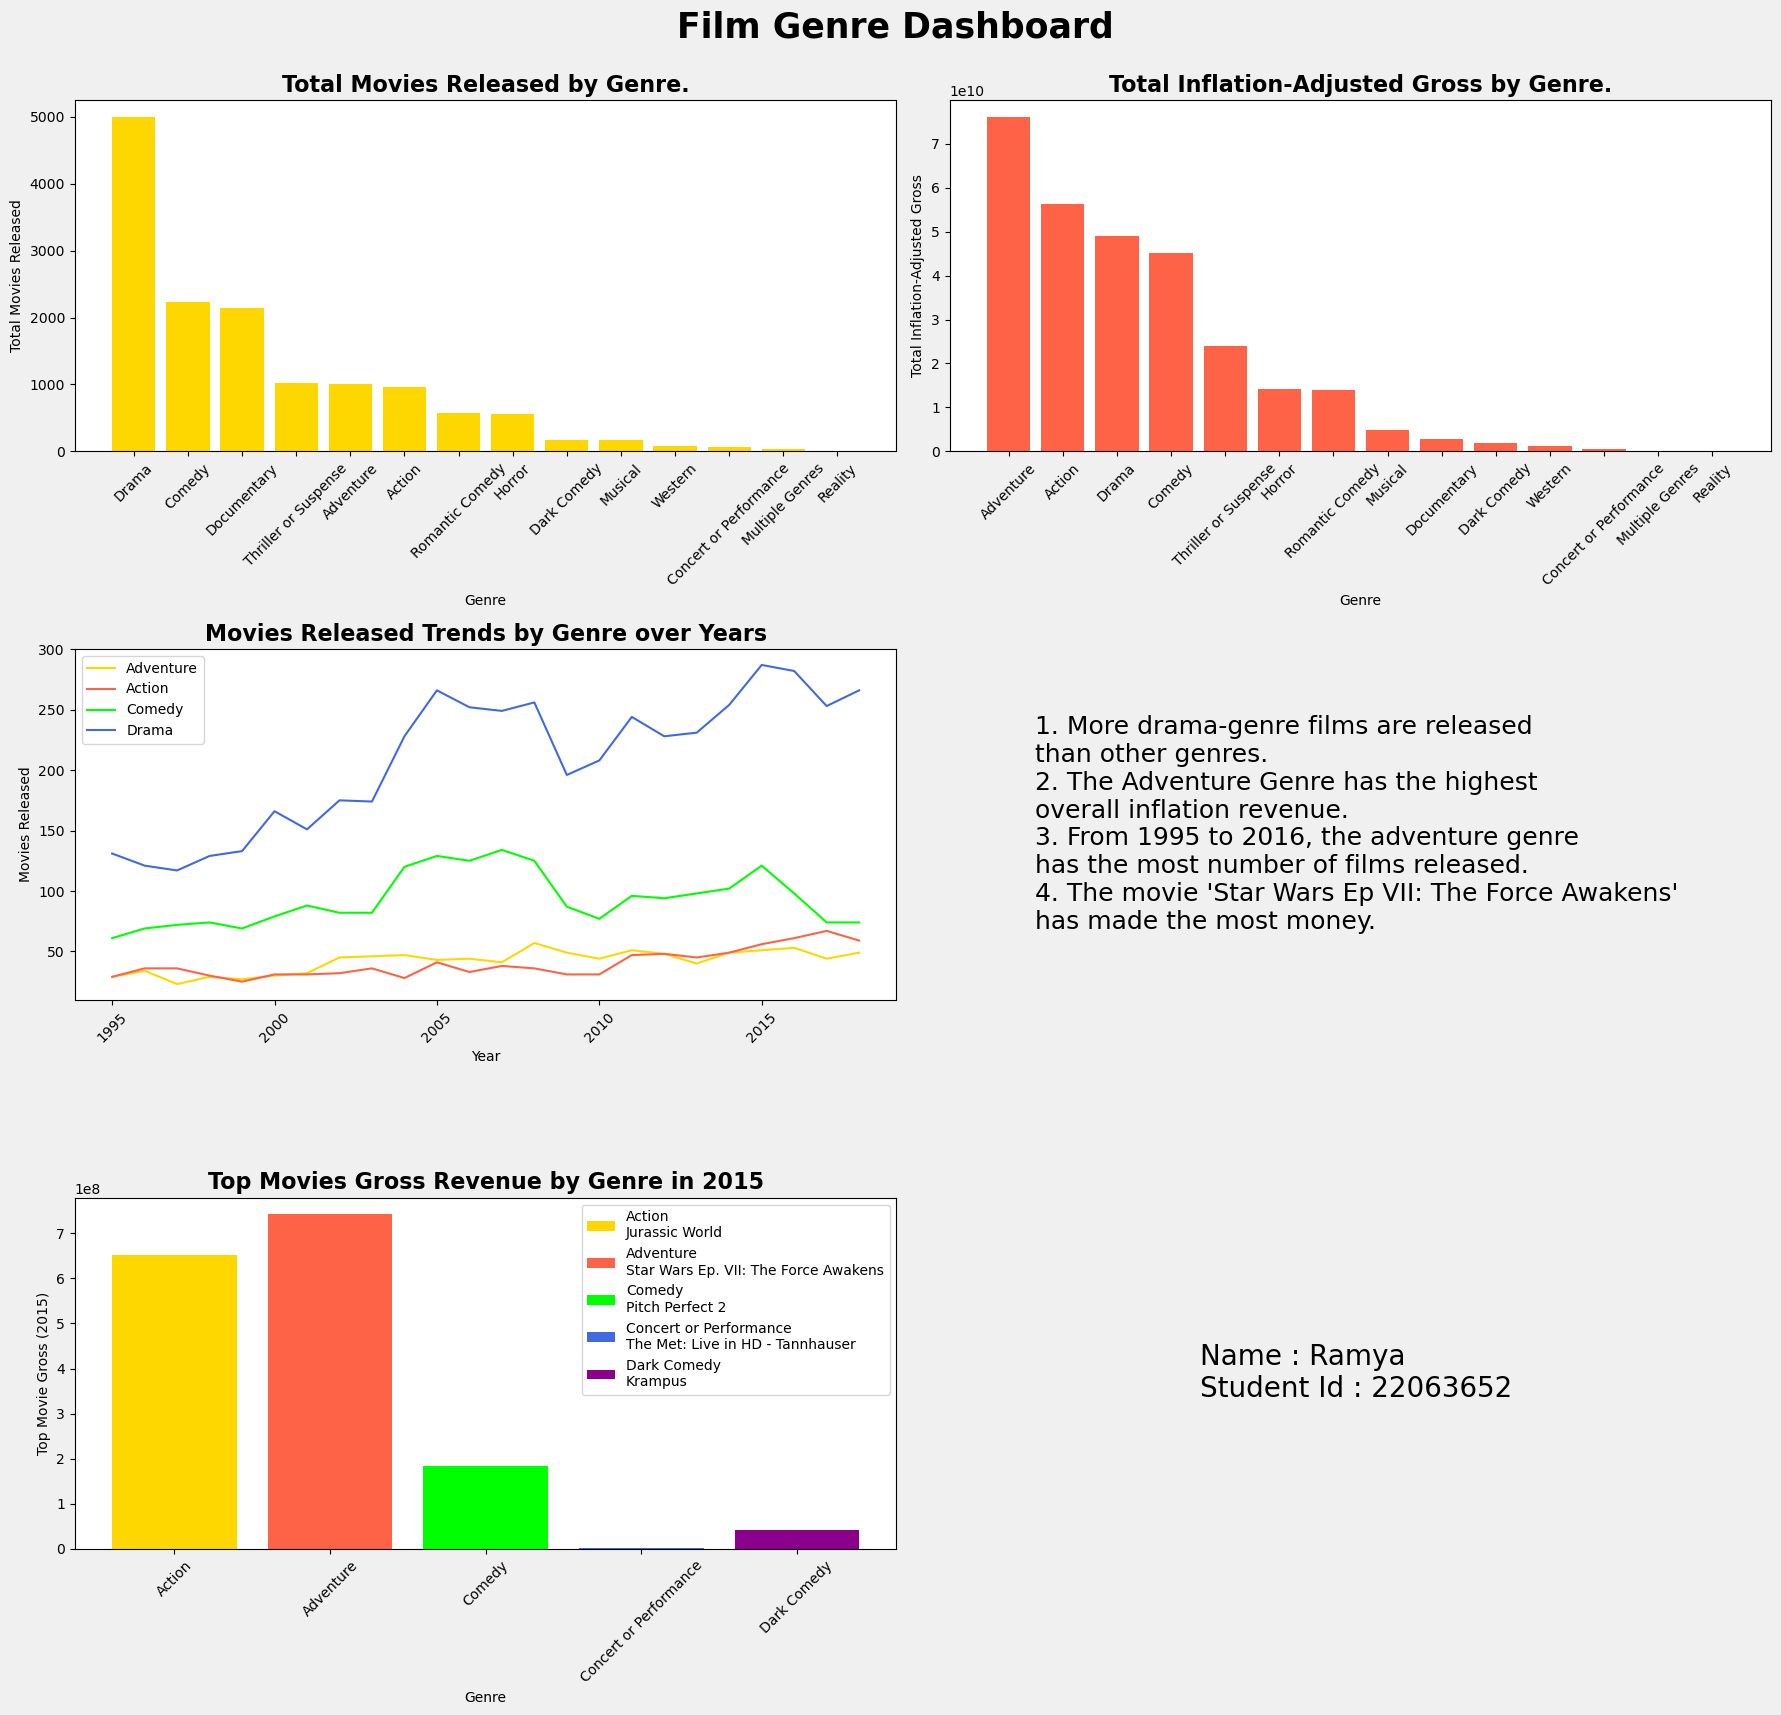

In [1]:
# Data Source Link : https://www.kaggle.com/datasets/thedevastator/film-genre-statistics
# Github Link :  https://github.com/pallaramya/dhv-assignment.git
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_path):
    """
    Load data from a CSV file.

    Parameters:
    - file_path (str): The path to the CSV file.

    Returns:
    - pd.DataFrame: A pandas DataFrame containing the loaded data.
    """
    return pd.read_csv(file_path)

def set_background_color(fig , color = '#f0f0f0'):
    """
    Set the background color of the entire plot.

    Parameters:
    - fig (matplotlib.figure.Figure): The matplotlib figure object.
    - color (str): The desired background color. Default is '#f0f0f0'.
    """
    fig.patch.set_facecolor(color)

def plot_total_movies(ax , data , color , title , xlabel , ylabel , rotation = 45):
    """
    Plot the total movies released by genre.

    Parameters:
    - ax (matplotlib.axes._subplots.AxesSubplot): The subplot to plot on.
    - data (pd.Series): The data to be plotted.
    - color (str): The color of the bars.
    - title (str): The title of the plot.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - rotation (int): The rotation angle for x-axis ticks. Default is 45.
    """
    ax.bar(data.index , data , color = color)
    ax.set_title(title , fontweight = 'bold' , fontsize = 16)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis = 'x' , rotation = rotation)

def plot_movies_trends(ax , data , genres , colors , xlabel , ylabel , rotation = 45):
    """
    Plot the movies released trends by genre over years.

    Parameters:
    - ax (matplotlib.axes._subplots.AxesSubplot): The subplot to plot on.
    - data (pd.DataFrame): The data to be plotted.
    - genres (list): List of genres of interest.
    - colors (list): List of colors for each genre.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - rotation (int): The rotation angle for x-axis ticks. Default is 45.
    """
    ax.set_title('Movies Released Trends by Genre over Years' , fontweight = 'bold' , fontsize = 16)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis = 'x' , rotation = rotation)

    for i, genre in enumerate(genres):
        if genre in data.index.get_level_values('Genre'):
            genre_data = data.loc[genre]
            ax.plot(genre_data.index.get_level_values('Year') , genre_data['Movies Released'] ,
                    label = genre , color = colors[i])

    ax.legend()

def plot_top_movies(ax , data , colors , xlabel , ylabel):
    """
    Plot the top movies gross revenue by genre in 2015.

    Parameters:
    - ax (matplotlib.axes._subplots.AxesSubplot): The subplot to plot on.
    - data (pd.DataFrame): The data to be plotted.
    - colors (list): List of colors for each genre.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    """
    for index , (genre , row) in enumerate(data.iterrows()):
        label_text = f"{row['Genre']}\n{row['Top Movie']}"
        ax.bar(index , row['Top Movie Gross (That Year)'] , label = label_text ,
               color = colors[index % len(colors)])

    ax.set_title('Top Movies Gross Revenue by Genre in 2015' , fontweight = 'bold' ,
                 fontsize = 16)
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data['Genre'] , rotation = 45)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

def add_text_subplot(ax , text , fontsize = 18):
    """
    Add text to a subplot with no axis.

    Parameters:
    - ax (matplotlib.axes._axes.Axes): The subplot with no axis.
    - text (str): The text to be added.
    - fontsize (int): The font size of the text. Default is 18.
    """
    ax.axis('off')
    ax.text(0.5 , 0.5 , text , ha = 'center' , va = 'center' , fontsize = fontsize ,
            color = 'black' , multialignment = 'left')

def create_dashboard(file_path , save_path):
    """
    Create a film genre dashboard and save it as an image.

    Parameters:
    - file_path (str): The path to the CSV file containing film genre data.
    - save_path (str): The path to save the generated dashboard image.
    """
    # Load data
    df = load_data(file_path)

    # Film-themed color palette
    film_colors = ['#FFD700' , '#FF6347' , '#00FF00' , '#4169E1' , '#8B008B']

    # Create subplots for the dashboard
    fig , axs = plt.subplots(3 , 2 , figsize = (18 , 18))

    # Set the background color for the entire plot
    set_background_color(fig)

    # Plot 1: Total Movies Released by Genre
    genre_movies_released = \
        df.groupby('Genre')['Movies Released'].sum().sort_values(ascending = False)
    plot_total_movies(axs[0 , 0] , genre_movies_released , film_colors[0] ,
                      'Total Movies Released by Genre.' , 'Genre' , 'Total Movies Released')

    # Plot 2: Total Inflation-Adjusted Gross by Genre
    genre_total_inflated_gross = \
        df.groupby('Genre')['Inflation-Adjusted Gross'].sum().sort_values(ascending = False)
    plot_total_movies(axs[0 , 1] , genre_total_inflated_gross , film_colors[1] ,
                      'Total Inflation-Adjusted Gross by Genre.' , 'Genre' ,
                      'Total Inflation-Adjusted Gross')

    # Plot 3: Movies Released Trends by Genre over Years
    grouped_by_genre_year = df.groupby(['Genre' , 'Year']).sum()
    genres_of_interest = ['Adventure' , 'Action' , 'Comedy' , 'Drama' , 'Sci-Fi']
    plot_movies_trends(axs[1 , 0] , grouped_by_genre_year , genres_of_interest , film_colors ,
                       'Year' , 'Movies Released')

    # Plot 4: Top Movies Gross Revenue by Genre in 2015
    movies_2015 = df[df['Year'] == 2015]
    grouped_by_genre_2015 = movies_2015.groupby('Genre')
    top_movies_2015 = grouped_by_genre_2015.apply\
        (lambda x: x.loc[x['Top Movie Gross (That Year)'].idxmax()]).reset_index(drop = True).head()
    plot_top_movies(axs[2 , 0] , top_movies_2015 , film_colors , 'Genre' , 'Top Movie Gross (2015)')

    # Text for axs[2, 0]
    add_text_subplot(axs[1 , 1] , "1. More drama-genre films are released \n"
                                 "than other genres.\n"
                                 "2. The Adventure Genre has the highest \n"
                                 "overall inflation revenue.\n"
                                 "3. From 1995 to 2016, the adventure genre \n"
                                 "has the most number of films released.\n"
                                 "4. The movie 'Star Wars Ep VII: The Force Awakens' \n"
                                 "has made the most money." , fontsize = 18)

    # Remove the empty subplot
    add_text_subplot(axs[2 , 1] , "Name : Ramya \n"
                                 "Student Id : 22063652 " , fontsize = 20)

    # Add main title
    fig.suptitle('Film Genre Dashboard' , fontsize = 25 , y = 0.95 , fontweight = 'bold')

    plt.tight_layout(rect = [0 , 0 , 1 , 0.95])
    plt.savefig(save_path)
    # plt.show()

# Example usage
create_dashboard('ThrowbackDataThursday Week 11 - Film Genre Stats.csv' , '22063652.png')
